# The task
The telecom operator wants to learn how to predict customer churn. If it turns out that the user is planning to leave, he will be offered promotional codes and special conditions.

### Description of data



- `contract.csv` — information about the contract;
- `personal.csv` — client's personal data;
- `internet.csv` — information about internet services;
- `phone.csv` — information about telephony services.


### Machine learning model prototype to be built

Target: Column 'EndDate' is 'No'.

Basic metric: AUC-ROC.
Additional metric: Accuracy.

In [1]:
#pip install plot-metric

<a name="1common."></a>
## <a name="0.0"></a>Table of contents:
* [Step 1. Load the data and prepare for their analysis](#1.)
* [Step 2. Encoding and scaling of features](#2.)
* [Step 3. Splitting data into samples](#3.)
    
* [Step 4. Exploring the models](#4.)     
     
* [Step 5. Results of model metrics in one table](#5.)
* [Step 6. Checking the best models on the test. ROC-AUC chart. Error matrix](#6.)
* [Step 7. The most significant features](#7.)
* [Step 8. Clustering clients](#8.)
* [Step 9. General conclusion](#9.)

<a name="1."></a><br/>
<font size="5"><b>1. Load the data and prepare for their analysis</b></font>.<br/>
[<font size="2">( to table of contents)</font>](#1common.)

In [2]:
#pip install Keras

In [3]:
#pip install tensorflow

In [4]:
#pip install catboost

In [5]:
#pip install plot-metric

In [6]:
import pandas as pd
from functools import reduce
import datetime
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.model_selection import train_test_split

#from keras.utils import to_categorical
from keras import models
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense
from tensorflow.keras.optimizers import Adam

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score,  GridSearchCV 
from sklearn.model_selection import cross_val_predict

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

from plot_metric.functions import BinaryClassification

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [7]:
# remove the limitation on the number and width of columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [8]:
data_contract=pd.read_csv('datasets/final_provider/contract.csv')
data_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [9]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [10]:
data_internet=pd.read_csv(('datasets/final_provider/internet.csv'))
data_internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [11]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [12]:
data_personal=pd.read_csv('datasets/final_provider/personal.csv')
data_personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [13]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [14]:
data_phone=pd.read_csv('datasets/final_provider/phone.csv')
data_phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [15]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [16]:
#combine all tables into one
data_frames = [data_contract,data_internet,data_personal,data_phone]

In [17]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['customerID'],
                                            how='outer'), data_frames)#.fillna('void')


In [18]:
df_merged.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [19]:
#general information about the table
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


In [20]:
#change the data type of the column BeginDate, TotalCharges
df_merged['BeginDate'] = pd.to_datetime(df_merged['BeginDate'])
df_merged['TotalCharges'] = pd.to_numeric(df_merged['TotalCharges'], errors='coerce')

In [21]:
#make sure the type has changed
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   InternetService   5517 non-null   object        
 9   OnlineSecurity    5517 non-null   object        
 10  OnlineBackup      5517 non-null   object        
 11  DeviceProtection  5517 non-null   object        
 12  TechSupport       5517 non-null   object        
 13  StreamingTV       5517 non-null   object        
 14  StreamingMovies   5517 n

In [22]:
#check for duplicates
df_merged.duplicated().sum()

0

In [23]:
#let's look at the number of data gaps
df_merged.isna().sum()

customerID          0   
BeginDate           0   
EndDate             0   
Type                0   
PaperlessBilling    0   
PaymentMethod       0   
MonthlyCharges      0   
TotalCharges        11  
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender              0   
SeniorCitizen       0   
Partner             0   
Dependents          0   
MultipleLines       682 
dtype: int64

In [24]:
#let's look at the skipping rate due to joining tables
df_merged['InternetService'].isna().sum()/len(df_merged['InternetService'])

0.21666903308249325

In [25]:
#let's look at the skipping rate due to joining tables
df_merged['MultipleLines'].isna().sum()/len(df_merged['MultipleLines'])

0.09683373562402385

In [26]:
df_merged['EndDate_year'] = df_merged['EndDate'].apply(lambda x: '2020-02-01' if x == 'No' else x) 
df_merged['EndDate_year'].head(5)

0    2020-02-01         
1    2020-02-01         
2    2019-12-01 00:00:00
3    2020-02-01         
4    2019-11-01 00:00:00
Name: EndDate_year, dtype: object

In [27]:
df_merged['EndDate_year'] = pd.to_datetime(df_merged['EndDate_year'])
df_merged['EndDate_year'] = df_merged['EndDate_year'].dt.year
df_merged['EndDate_year'].head(3)

0    2020
1    2020
2    2019
Name: EndDate_year, dtype: int64

In [28]:
#turn the target column into binary, where 0 - corresponds to "NO", 
#1 - "YES" (the date of termination of the contract, the client has left)
df_merged['EndDate'] = df_merged['EndDate'].apply(lambda x: '0' if x == 'No' else '1').astype(int)    

In [29]:
#let's look at the class balance 
df_merged['EndDate'].value_counts()

0    5174
1    1869
Name: EndDate, dtype: int64

In [30]:
#share ratio of classes
df_merged['EndDate'].where(df_merged['EndDate'] == 0).count()/len(df_merged['EndDate'])

0.7346301292063041

In [31]:
df_merged['EndDate'].where(df_merged['EndDate'] == 1).count()/len(df_merged['EndDate'])

0.2653698707936959

In [32]:
#split column BeginDate (year)
df_merged['Begin_year'] = df_merged['BeginDate'].dt.year

In [33]:
df_merged['Live_period'] = df_merged['EndDate_year'] - df_merged['Begin_year']
df_merged['Live_period'].head(10)

0    0
1    3
2    0
3    4
4    0
5    0
6    2
7    1
8    2
9    6
Name: Live_period, dtype: int64

In [34]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   int64         
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   InternetService   5517 non-null   object        
 9   OnlineSecurity    5517 non-null   object        
 10  OnlineBackup      5517 non-null   object        
 11  DeviceProtection  5517 non-null   object        
 12  TechSupport       5517 non-null   object        
 13  StreamingTV       5517 non-null   object        
 14  StreamingMovies   5517 n

In [35]:
#check that the columns have been added
df_merged.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines', 'EndDate_year', 'Begin_year',
       'Live_period'],
      dtype='object')

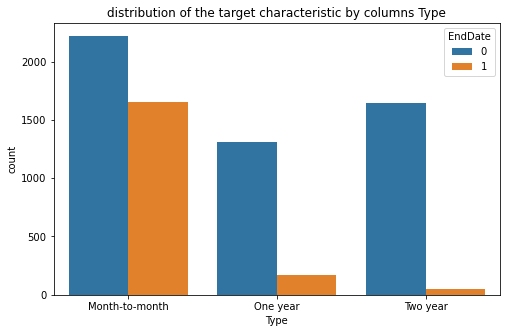

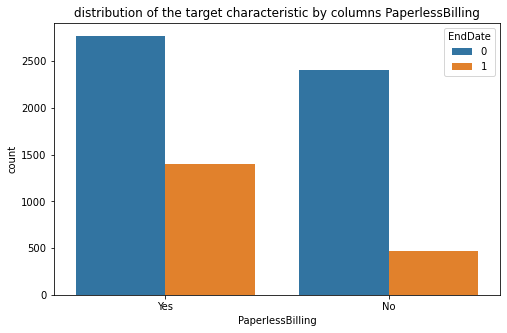

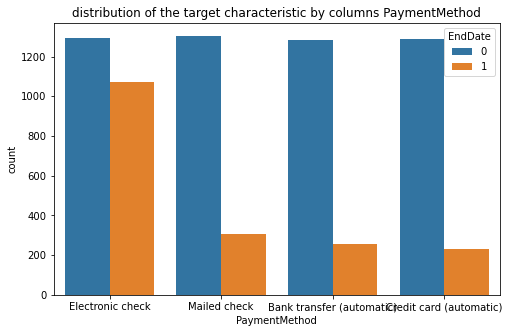

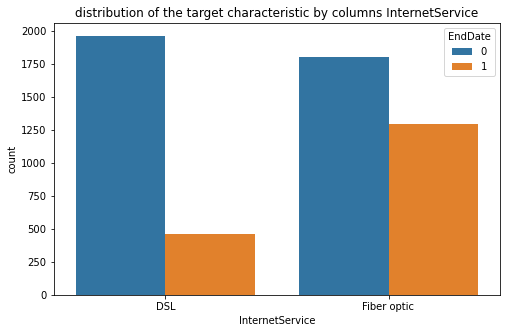

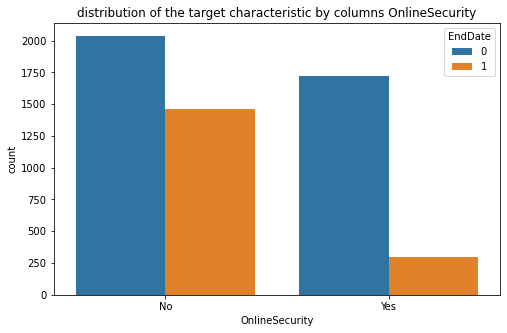

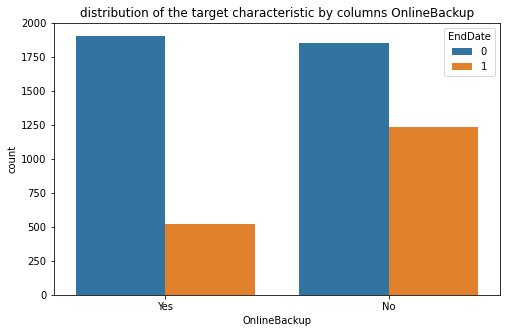

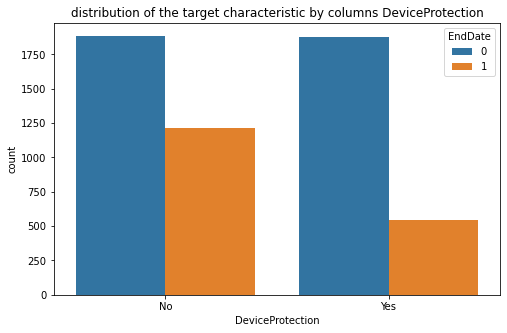

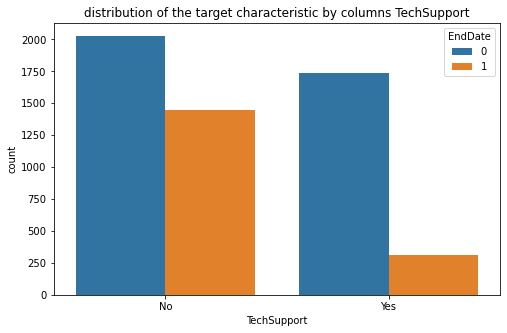

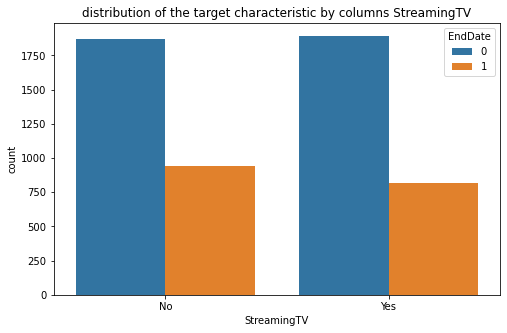

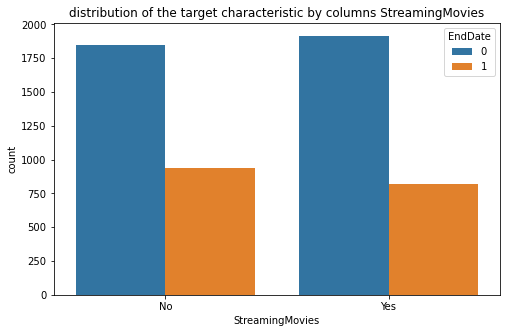

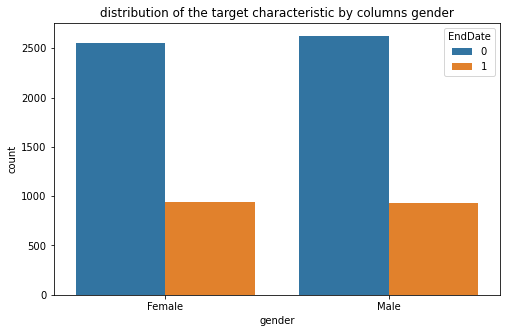

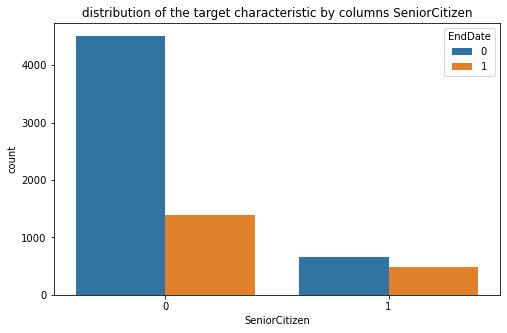

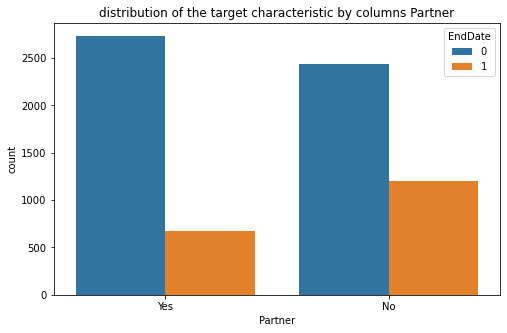

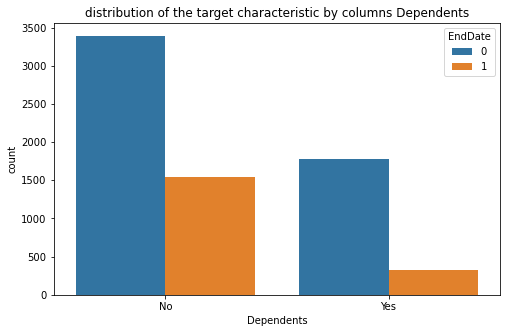

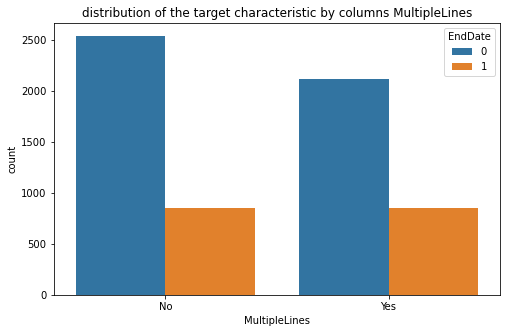

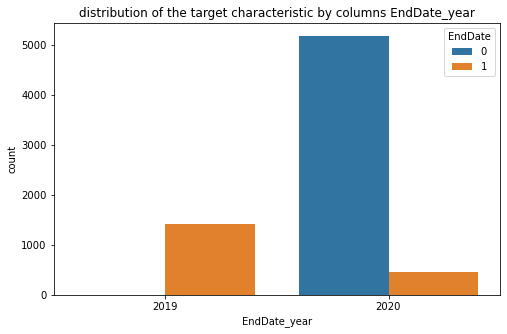

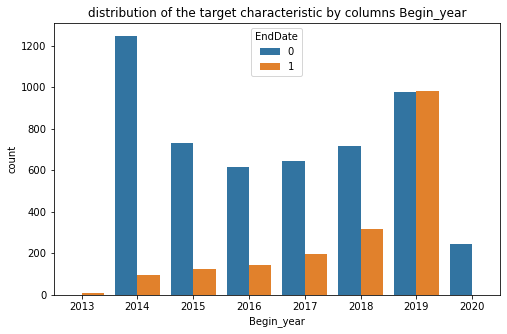

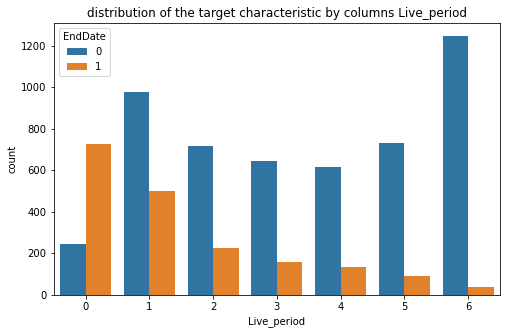

In [36]:
#distribution of the target characteristic by columns
for column in df_merged.drop(columns = ['customerID','BeginDate','EndDate','MonthlyCharges', 'TotalCharges']).columns:
    fig, ax = plt.subplots(figsize=(8,5))
    sns.countplot(x=column, hue='EndDate', data=df_merged, ax=ax)
    plt.title('distribution of the target characteristic by columns '+ str(column))
    plt.show();

<Figure size 800x640 with 0 Axes>

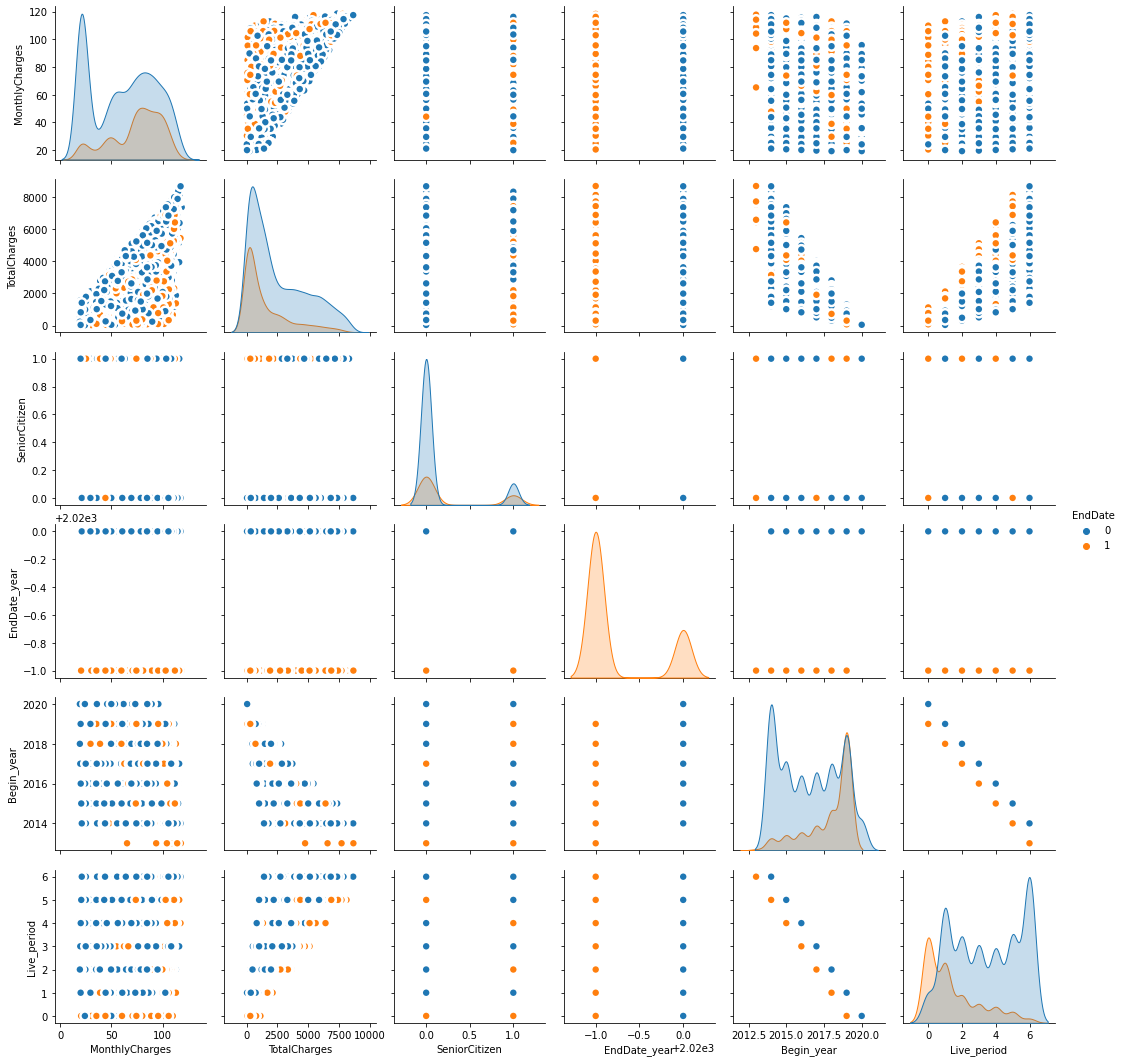

In [37]:
#relationship between all possible pairs of numeric variables
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df_merged, kind='scatter', hue='EndDate', plot_kws=dict(s=80, edgecolor='white', linewidth=2.5))
#plt.title('relationship between all possible pairs of numeric variables')
plt.show();

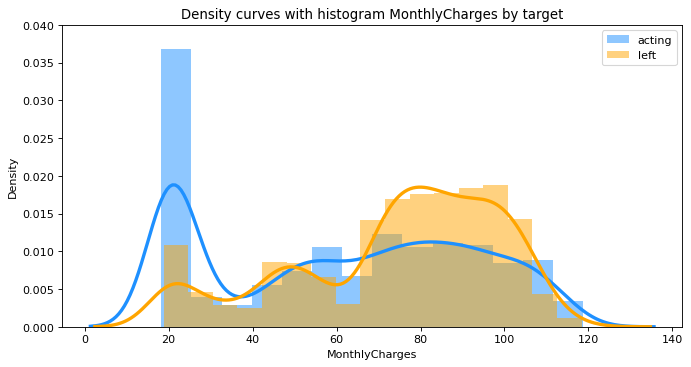

In [38]:
plt.figure(figsize=(10,5), dpi= 80)
sns.distplot(df_merged.loc[df_merged['EndDate'] == 0, 'MonthlyCharges'], 
             color='dodgerblue', label='acting', hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
sns.distplot(df_merged.loc[df_merged['EndDate'] == 1, 'MonthlyCharges'], 
             color='orange', label='left', hist_kws={'alpha':.5}, kde_kws={'linewidth':3})
plt.ylim(0, 0.04)

plt.title('Density curves with histogram MonthlyCharges by target', fontsize=12)
plt.legend()
plt.show()

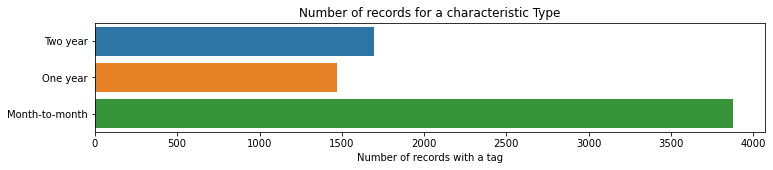

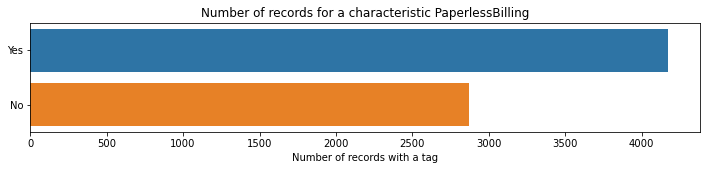

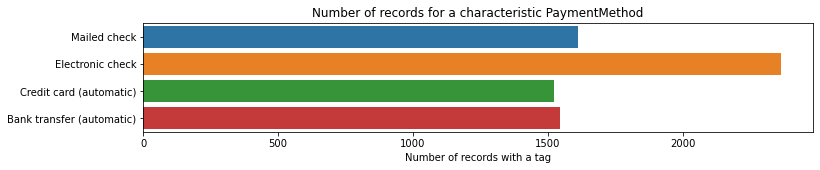

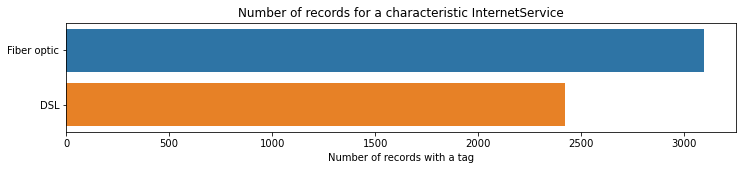

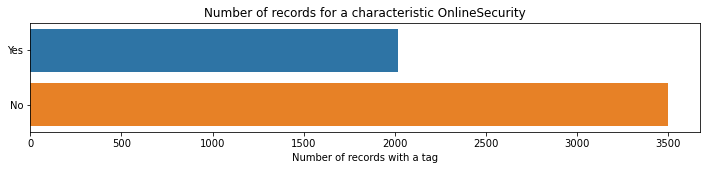

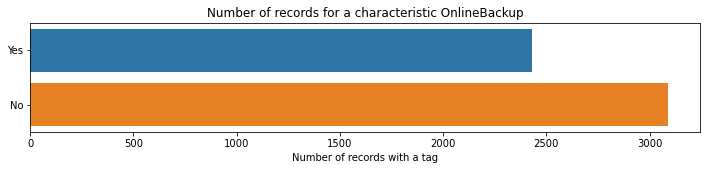

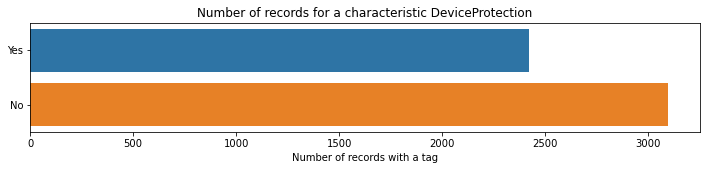

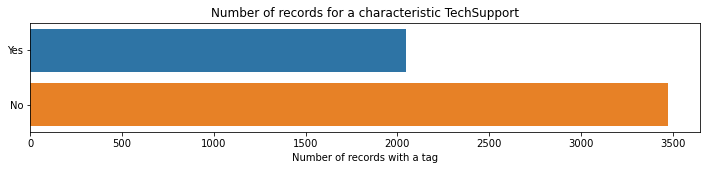

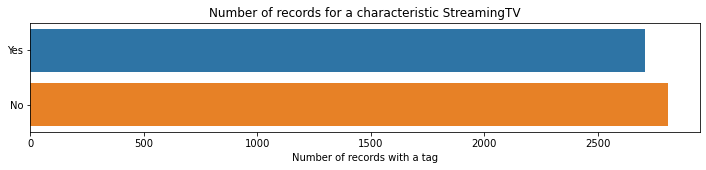

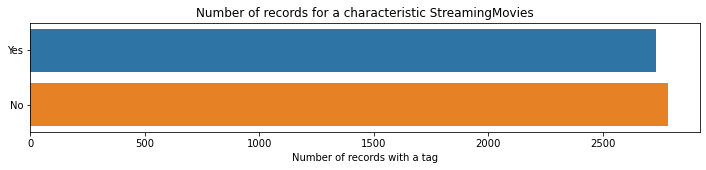

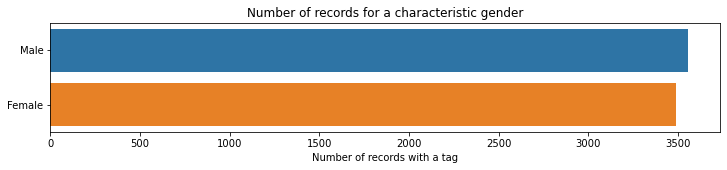

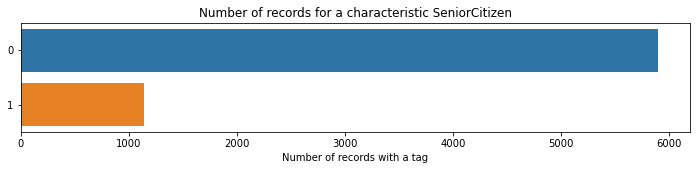

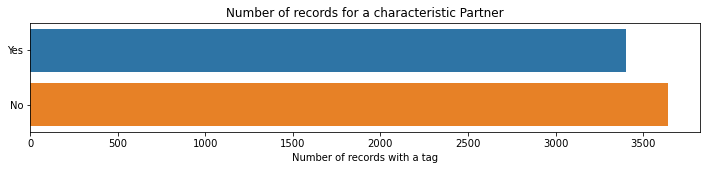

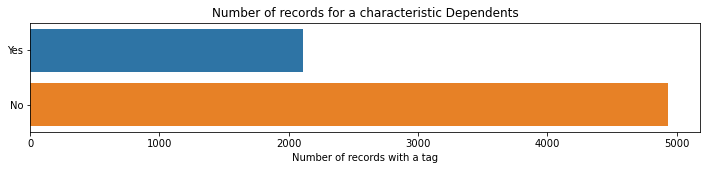

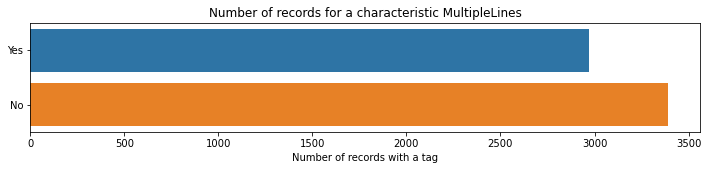

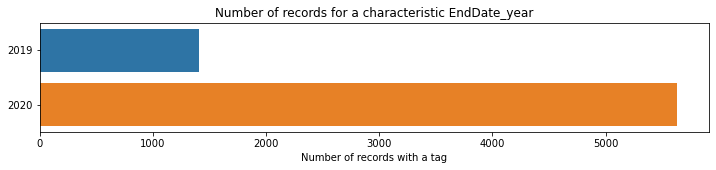

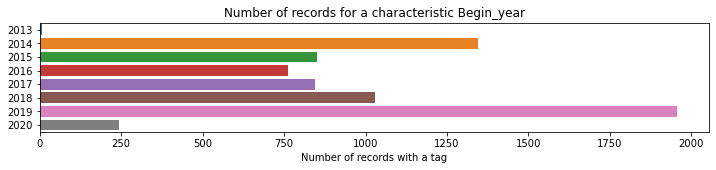

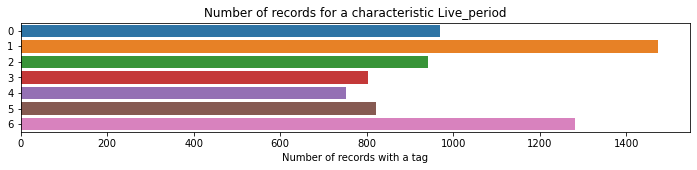

In [39]:
# general data distribution
for column in df_merged.drop(columns = ['customerID','BeginDate','EndDate','MonthlyCharges', 'TotalCharges']).columns:
    fig, ax = plt.subplots(figsize=(12,2))
    sns.countplot(y=column, data=df_merged.sort_values(by=column, ascending=False), ax=ax, saturation=0.8, orient ='h')
    plt.title('Number of records for a characteristic '+ str(column))
    plt.xlabel('Number of records with a tag')
    plt.ylabel('')
    plt.show();

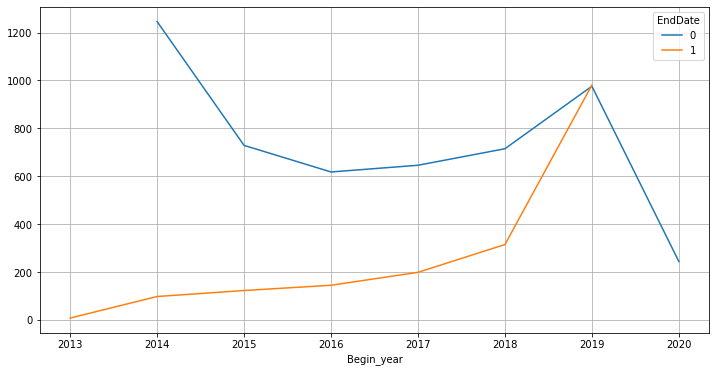

In [40]:
#Make sure there really is a churn of customers
type_pivot=df_merged.pivot_table(index='Begin_year', columns='EndDate', values = 'MonthlyCharges', aggfunc='count')
type_pivot.plot(figsize=(12,6), grid=True);

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:  </b> 
1.The data were loaded. 4 tables were combined into one. As a result, there were 7043 rows and 23.  The gaps appeared in the combined table. We will not delete them. (the share of omissions is 20% and 9%). If necessary, I will fill them in with the word void. The data type of the columns were changed to the most appropriate ones. Since our task is to stop the churn of customers, and the target feature is the 'EndDate' == 'No' column, it is logical to assume that the contract termination date in this column is not important and can be replaced with 'YES'. Thus, we got a binary classification problem.




It was found out that the classes are not balanced. 74% - class "0" (current contract) and 26% - class "1" (contract terminated). We looked at the distribution of the target feature across the columns. .Looking at the graghs we can see that the customers who stayed, in general, do not have a clear preference for the data collected. For example: almost the same number of active customers have a TV subscription and the same number of them not. As for the class "1" - preferences are clearly visible there. It can also be concluded that most contracts are terminated by the end of the year.



It can also be said that the main existing customers pay min monthly fees. Those who left paid more than average. For some columns, the data "left" / "remained" are distributed almost equally.



The latest chart confirms the company's concerns. Indeed, the conclusion of new contracts has declined, and the number of terminations is increasing. </div>



<a name="2."></a><br/>
<font size="5"><b>2. Encoding and scaling of features.</b></font>.<br/>
[<font size="2">(to table of contents)</font>](#1common.)

In [41]:
df_merged.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,EndDate_year,Begin_year,Live_period
0,7590-VHVEG,2020-01-01,0,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN,2020,2020,0
1,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,2020,2017,3
2,3668-QPYBK,2019-10-01,1,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No,2019,2019,0


In [42]:
#remove unnecessary columns
df_merged=df_merged.drop(['customerID','BeginDate', 'EndDate_year','Begin_year'], axis=1)

In [43]:
df_merged

,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Live_period
0,0,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN,0
1,0,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,3
2,1,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No,0
3,0,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN,4
4,1,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,One year,Yes,Mailed check,84.80,1990.50,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes,2
7039,0,One year,Yes,Credit card (automatic),103.20,7362.90,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes,6
7040,0,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,NaN,1
7041,1,Month-to-month,Yes,Mailed check,74.40,306.60,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,Yes,0


In [44]:
df_merged.columns

Index(['EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'Live_period'],
      dtype='object')

In [45]:
#ohe-coding co-categorical columns
df_merged_categ=df_merged.drop(['MonthlyCharges', 'TotalCharges', 'Live_period'], axis=1)

df_ohe = pd.get_dummies(df_merged_categ, drop_first=True)
#df_ohe.info()

In [46]:
#Let's combine tables of categorical features and numerical ones.
df=df_merged[['MonthlyCharges', 'TotalCharges', 'Live_period']].join(df_ohe, how='right')
df.dropna(inplace=True)
#df.info()
#df.isnull().sum()

In [47]:
df

,MonthlyCharges,TotalCharges,Live_period,EndDate,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes
0,29.85,29.85,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,56.95,1889.50,3,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
2,53.85,108.15,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0
3,42.30,1840.75,4,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
4,70.70,151.65,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,2,0,0,1,0,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1
7039,103.20,7362.90,6,0,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1
7040,29.60,346.45,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0
7041,74.40,306.60,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1


<a name="3."></a><br/>
<font size="5"><b>3. Splitting data into samples</b></font>.<br/>
[<font size="2">(to table of contents )</font>](#1common.)

In [48]:
features=df.drop(['EndDate'], axis=1)
target=df['EndDate']

# divide the samples into train and valid
features_train, features_valid_2, target_train, target_valid_2 = train_test_split(
   features, target, test_size=0.4, random_state=90)

features_valid, features_test, target_valid, target_test = train_test_split(
   features_valid_2,target_valid_2, test_size=0.5, random_state=90)

In [49]:
#scaling numerical features
numeric=['MonthlyCharges', 'TotalCharges', 'Live_period']

scaler=StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [50]:
print('Size of the training sample:', features_train.shape, target_train.shape)
print('Size of the validation sample:', features_valid.shape, target_valid.shape)
print('Test sample size:', features_test.shape, target_test.shape)

Size of the training sample: (4219, 21) (4219,)
Size of the validation sample: (1406, 21) (1406,)
Test sample size: (1407, 21) (1407,)


In [51]:
#just in case, let's prepare samples for cross_valid and neural network
features_cr_train, features_cr_test, target_cr_train, target_cr_test = train_test_split(
   features, target, test_size=0.2, random_state =90)

In [52]:
scaler.fit(features_cr_train[numeric])

features_cr_train[numeric] = scaler.transform(features_cr_train[numeric])
features_cr_test[numeric] = scaler.transform(features_cr_test[numeric])

In [53]:
print('Cross_valid training sample size :', features_cr_train.shape, target_cr_train.shape)
print('Test sample size for cross_valid:', features_cr_test.shape, target_cr_test.shape)

Cross_valid training sample size : (5625, 21) (5625,)
Test sample size for cross_valid: (1407, 21) (1407,)


<a name="4."></a><br/>
<font size="5"><b>4. Exploring the models</b></font>.<br/>
[<font size="2">(to table of contents)</font>](#1common.)

In [54]:
# model Sequential()
train_x = features_cr_train
train_y = target_cr_train

test_x = features_cr_test
test_y = target_cr_test

In [55]:
model = Sequential()

model.add(layers.Dense(50, activation = "relu", input_shape=(21, )))

model.add(layers.Dropout(0.3, noise_shape=None,  seed=90))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=90))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

#model.summary()

In [56]:
optimizer = Adam(lr=0.001)

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['acc','AUC'])

In [57]:
results = model.fit(train_x, train_y, epochs= 80, batch_size = 16, 
                    validation_data = (test_x, test_y), verbose=None)

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 50)                1100      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 50)                0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 50)                2550      
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 50)                0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 50)                2550      
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 1)                 51        
Total params: 6,251
Trainable params: 6,251
Non-trainable params: 0
______________________________________________________

In [59]:
accuracy = np.max(results.history['acc'])
roc_auc = np.max(results.history['auc'])

In [60]:
print('*'*60)
print('ROC_AUC_score Sequential:', roc_auc)
print('Accuracy Sequential:', accuracy )
print('*'*60)

************************************************************
ROC_AUC_score Sequential: 0.9338760375976562
Accuracy Sequential: 0.8798221945762634
************************************************************


In [61]:
val_accuracy = np.max(results.history['val_acc'])
val_roc_auc_score = np.max(results.history['val_auc'])

In [62]:
print('Test sample')
print('*'*60)
print('val_accuracy:', val_accuracy)
print('val_roc_auc_score:',val_roc_auc_score)

Test sample
************************************************************
val_accuracy: 0.8734896779060364
val_roc_auc_score: 0.9096532464027405


In [63]:
%%time

#model LogisticRegression
grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
model_lr=LogisticRegression()
grid_search=GridSearchCV(model_lr, grid, cv=5, verbose=100, n_jobs=-1)

grid_search.fit(features_train,target_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  13 out of  35 | elapsed:    1.8s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  14 out of

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             verbose=100)

In [64]:
acc_model_lr = grid_search.best_score_

print('*'*60)
print('Accuracy LogisticRegression:', acc_model_lr )
print('*'*60)

************************************************************
Accuracy LogisticRegression: 0.8430917002580494
************************************************************


In [65]:
grid_search.best_params_  

{'C': 10}

In [66]:
%%time

model_lr=LogisticRegression(random_state=90, C=10, verbose=100)
model_lr.fit(features_train,target_train)
probabilities_lr = model_lr.predict_proba(features_valid)[:,1]
roc_auc_lr = roc_auc_score(target_valid, probabilities_lr)

print('*'*60)
print('ROC_AUC_score LogisticRegression:', roc_auc_lr)
print('*'*60)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
************************************************************
ROC_AUC_score LogisticRegression: 0.8892961876832846
************************************************************
CPU times: user 192 ms, sys: 4.53 ms, total: 197 ms
Wall time: 32.8 ms


In [67]:
%%time
#model RandomForestClassifier
model_forest = RandomForestClassifier(random_state=90) #class_weight = 'balanced' метрика хуже
params = {'max_depth': range(2,10,2), 'n_estimators': range(1,155,50)}
grid_search = GridSearchCV(model_forest, param_grid=params, scoring = 'accuracy', cv=5, n_jobs=-1, verbose=100)

grid_search.fit(features_train,target_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0753s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  13 tas

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=90), n_jobs=-1,
             param_grid={'max_depth': range(2, 10, 2),
                         'n_estimators': range(1, 155, 50)},
             scoring='accuracy', verbose=100)

In [68]:
acc_model_forest = grid_search.best_score_
print('*'*60)
print('Accuracy RandomForestClassifier:', acc_model_forest )
print('*'*60)

************************************************************
Accuracy RandomForestClassifier: 0.8447510302294334
************************************************************


In [69]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 151}

In [70]:
model_forest = RandomForestClassifier(random_state=90, max_depth=8, n_estimators=151)
model_forest.fit(features_train,target_train)
probabilities_forest = model_forest.predict_proba(features_valid)[:,1]
roc_auc_forest = roc_auc_score(target_valid, probabilities_forest)
print('*'*60)
print('ROC_AUC_score RandomForestClassifier:', roc_auc_forest)
print('*'*60)

************************************************************
ROC_AUC_score RandomForestClassifier: 0.8887463343108505
************************************************************


In [71]:
%%time
#model DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state=90)
params = {'max_depth': range(2,10,2), 'min_samples_split': range(2,10,)}
grid_search = GridSearchCV(model_tree, param_grid=params, scoring = 'accuracy', cv=5, n_jobs=-1, verbose=100)
                           
grid_search.fit(features_train,target_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0133s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  13 ta

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=90), n_jobs=-1,
             param_grid={'max_depth': range(2, 10, 2),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy', verbose=100)

In [72]:
acc_model_tree=grid_search.best_score_
print('*'*60)
print('Accuracy DecisionTreeClassifier:', acc_model_tree )
print('*'*60)

************************************************************
Accuracy DecisionTreeClassifier: 0.8584998847492311
************************************************************


In [73]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_split': 6}

In [74]:
model_tree = DecisionTreeClassifier(random_state=90, max_depth=8, min_samples_split=6)
model_tree.fit(features_train,target_train)
probabilities_tree = model_tree.predict_proba(features_valid)[:,1]
roc_auc_tree = roc_auc_score(target_valid, probabilities_tree)
print('*'*60)
print('ROC_AUC_score DecisionTreeClassifier:', roc_auc_tree)
print('*'*60)

************************************************************
ROC_AUC_score DecisionTreeClassifier: 0.8577267875625324
************************************************************


In [75]:
%%time
#model CatBoostClassifier
model_cb = CatBoostClassifier(verbose=100, eval_metric='Accuracy', depth = 4)
                                
model_cb.fit(features_train,target_train, eval_set=(features_valid,target_valid))
predictions_cb = model_cb.predict(features_valid)
probabilities_cb = model_cb.predict_proba(features_valid)[:,1]
acc_model_cb=accuracy_score(target_valid, predictions_cb)

print('*'*60)
print('Accuracy CatBoostClassifier:', acc_model_cb )
print('*'*60)


Learning rate set to 0.045221
0:	learn: 0.8118037	test: 0.7987198	best: 0.7987198 (0)	total: 54.3ms	remaining: 54.3s
100:	learn: 0.8703484	test: 0.8627312	best: 0.8627312 (100)	total: 219ms	remaining: 1.95s
200:	learn: 0.8867030	test: 0.8762447	best: 0.8783784 (198)	total: 366ms	remaining: 1.45s
300:	learn: 0.8980801	test: 0.8854908	best: 0.8854908 (295)	total: 522ms	remaining: 1.21s
400:	learn: 0.9018725	test: 0.8847795	best: 0.8869132 (344)	total: 670ms	remaining: 1s
500:	learn: 0.9070870	test: 0.8876245	best: 0.8876245 (434)	total: 829ms	remaining: 825ms
600:	learn: 0.9132496	test: 0.8883357	best: 0.8897582 (597)	total: 977ms	remaining: 648ms
700:	learn: 0.9160939	test: 0.8876245	best: 0.8897582 (597)	total: 1.14s	remaining: 487ms
800:	learn: 0.9198862	test: 0.8869132	best: 0.8897582 (597)	total: 1.29s	remaining: 321ms
900:	learn: 0.9236786	test: 0.8890469	best: 0.8897582 (597)	total: 1.44s	remaining: 159ms
999:	learn: 0.9260488	test: 0.8897582	best: 0.8904694 (947)	total: 1.59s	rem

In [76]:
roc_auc_cb = roc_auc_score(target_valid, probabilities_cb)
print('*'*60)
print('ROC_AUC_score CatBoostClassifier:', roc_auc_cb)
print('*'*60)

************************************************************
ROC_AUC_score CatBoostClassifier: 0.9206849987062273
************************************************************


In [77]:
%%time
#model GradientBoostingClassifier
model_gbc = GradientBoostingClassifier(random_state=90)
params= {'max_depth': range(2,20,2), 'n_estimators': range(5,40,5)}

grid_model_gbc = GridSearchCV(model_gbc, param_grid=params, scoring = 'accuracy',
                           cv=5, verbose=0)

grid_model_gbc.fit(features_train, target_train)

CPU times: user 1min 27s, sys: 115 ms, total: 1min 27s
Wall time: 1min 27s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=90),
             param_grid={'max_depth': range(2, 20, 2),
                         'n_estimators': range(5, 40, 5)},
             scoring='accuracy')

In [78]:
acc_model_gbc=grid_search.best_score_
print('*'*60)
print('ROC_AUC_score GradientBoostingClassifier:', acc_model_gbc)
print('*'*60)

************************************************************
ROC_AUC_score GradientBoostingClassifier: 0.8584998847492311
************************************************************


In [79]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_split': 6}

In [80]:
model_gbc = GradientBoostingClassifier(random_state=90, max_depth=8, min_samples_split=6)
model_gbc.fit(features_train,target_train)
probabilities_gbc = model_gbc.predict_proba(features_valid)[:,1]
roc_auc_gbc = roc_auc_score(target_valid, probabilities_gbc)
print('*'*60)
print('ROC_AUC_score GradientBoostingClassifier:', roc_auc_gbc)
print('*'*60)

************************************************************
ROC_AUC_score GradientBoostingClassifier: 0.9143226022080386
************************************************************


In [81]:
%%time
#the DummyClassifier model to get a measure of the base performance (Checking models for sanity)

model_dc = DummyClassifier(strategy='most_frequent',  random_state=90) 
model_dc.fit(features_train,target_train)
predictions_dc = model_dc.predict(features_valid)
acc_model_dc=accuracy_score(target_valid, predictions_dc)

print('*'*60)
print('ROC_AUC_score DummyClassifier:', acc_model_dc)
print('*'*60)

************************************************************
ROC_AUC_score DummyClassifier: 0.7496443812233285
************************************************************
CPU times: user 2.15 ms, sys: 1.21 ms, total: 3.36 ms
Wall time: 2.32 ms


In [82]:
probabilities_dc = model_dc.predict_proba(features_valid)[:,1]
roc_auc_dc = roc_auc_score(target_valid, probabilities_dc)
print('*'*60)
print('ROC_AUC_score DummyClassifier:', roc_auc_dc)
print('*'*60)

************************************************************
ROC_AUC_score DummyClassifier: 0.5
************************************************************


<a name="5."></a><br/>
<font size="5"><b>5. Results of model metrics in one table</b></font>.<br/>
[<font size="2">(to table of contents)</font>](#1common.)

In [83]:
#we will summarize the results of the models in one table
results = [
    [accuracy, roc_auc],
    [acc_model_lr, roc_auc_lr],
    [acc_model_forest, roc_auc_forest],
    [acc_model_tree, roc_auc_tree],
    [acc_model_cb, roc_auc_cb],
    [acc_model_gbc, roc_auc_gbc],
    [acc_model_dc, roc_auc_dc]
    
];
pd.DataFrame(data = results,
             index=['Sequential','LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier',
                    'CatBoostClassifier',
                    'GradientBoostingClassifier', 'DummyClassifier'],
             columns=['accuracy', 'roc_auc_score'])

,accuracy,roc_auc_score
Sequential,0.879822,0.933876
LogisticRegression,0.843092,0.889296
RandomForestClassifier,0.844751,0.888746
DecisionTreeClassifier,0.858500,0.857727
CatBoostClassifier,0.890469,0.920685
GradientBoostingClassifier,0.858500,0.914323
DummyClassifier,0.749644,0.500000


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:  </b> 
We carried out categorization and scaling of features. The dataset was devided into features and a target feature. One neural network and 6 models were trained. The best metric is given by a neural network, but on the test this indicator is less than that one of other models. For now, let's take 2 models: CatBoostClassifier and GradientBoostingClassifier and check the metrics in the test.</div>

<a name="6."></a><br/>
<font size="5"><b>6. Checking the best models on the test. ROC-AUC chart. Error matrix</b></font>.<br/>
[<font size="2">(to table of contents)</font>](#1common.)

In [84]:
#model CatBoostClassifier test

model_test = CatBoostClassifier(verbose=False, eval_metric='Accuracy', depth = 4)
                              
model_test.fit(features_train,target_train)
predictions_test = model_test.predict(features_test)
probabilities_test = model_test.predict_proba(features_test)[:,1]

acc_model_test=accuracy_score(target_test, predictions_test)
roc_auc_test = roc_auc_score(target_test, probabilities_test)

print('*'*60)
print('Accuracy score test model:', acc_model_test)
print('*'*60)
print('ROC_AUC_score test model:', roc_auc_test)
print('*'*60)

************************************************************
Accuracy score test model: 0.8706467661691543
************************************************************
ROC_AUC_score test model: 0.9144834631592389
************************************************************


In [85]:
#model GradientBoostingClassifier test

model_gbc_test = GradientBoostingClassifier(random_state=90, max_depth=8, min_samples_split=6)
model_gbc_test.fit(features_train,target_train)

predictions_gbc_test = model_gbc_test.predict(features_test)
probabilities_gbc_test = model_gbc_test.predict_proba(features_test)[:,1]

acc_model_gbc_test=accuracy_score(target_test, predictions_gbc_test)
roc_auc_gbc_test = roc_auc_score(target_test, probabilities_gbc_test)

print('*'*60)
print('Accuracy score test GradientBoostingClassifier:', acc_model_gbc_test)

print('*'*60)
print('ROC_AUC_score test GradientBoostingClassifier:', roc_auc_gbc_test)
print('*'*60)

************************************************************
Accuracy score test GradientBoostingClassifier: 0.8678038379530917
************************************************************
ROC_AUC_score test GradientBoostingClassifier: 0.906389988507215
************************************************************


In [86]:
#we will summarize the results of 3 best models and tests in one table
best_results = [
    [accuracy, val_accuracy, roc_auc, val_roc_auc_score],
    [acc_model_cb, acc_model_test, roc_auc_cb, roc_auc_test],
    [acc_model_gbc, acc_model_gbc_test, roc_auc_gbc, roc_auc_gbc_test]
];

pd.DataFrame(data = best_results,
             index=['Sequential','CatBoostClassifier', 'GradientBoostingClassifier'],
                   columns=['accuracy', 'test_accuracy','roc_auc_score', 'test_roc_auc_score'])

,accuracy,test_accuracy,roc_auc_score,test_roc_auc_score
Sequential,0.879822,0.873490,0.933876,0.909653
CatBoostClassifier,0.890469,0.870647,0.920685,0.914483
GradientBoostingClassifier,0.858500,0.867804,0.914323,0.906390


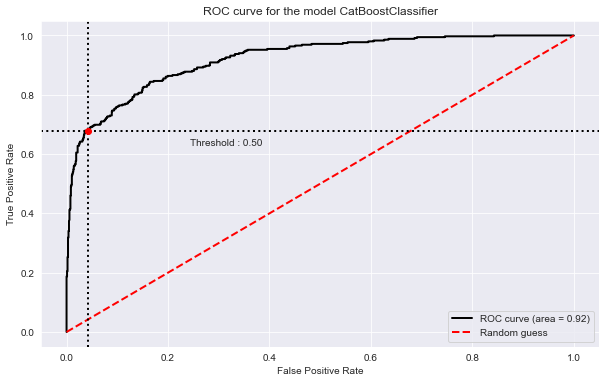

In [87]:
#build a ROC-AUC curve
catboost = BinaryClassification(target_valid, probabilities_cb, labels=['Class 1'])
plt.figure(figsize=(10,6))
catboost.plot_roc_curve()
plt.title('ROC curve for the model CatBoostClassifier')
plt.show()

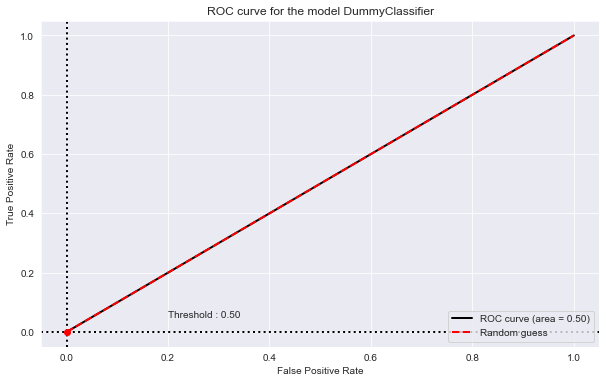

In [88]:
#baselain ROC-AUC curve
dummy = BinaryClassification(target_valid, probabilities_dc, labels=['Class 1'])
plt.figure(figsize=(10,6))
dummy.plot_roc_curve()
plt.title('ROC curve for the model DummyClassifier')
plt.show()

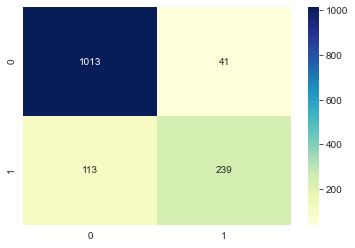

In [89]:
# error matrix of model CatBoostClassifier
conf_matrix = confusion_matrix(target_valid,predictions_cb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu');

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:  </b> The best value roc_auc_score = 0.91 on the test sample was shown by the CatBoostClassifier model. An error curve and an error matrix were constructed for this model.</div>

<a name="7."></a><br/>
<font size="5"><b>7.The most significant features</b></font>.<br/>
[<font size="2">(to table of contents)</font>](#1common.)

In [90]:
#let's see how the importance of values is distributed according to features in the best model
feature_importances = model_cb.get_feature_importance()
feature_names = df_ohe.drop('EndDate', axis=1).columns

feature_importances_grid = pd.DataFrame([], columns = ['feature', 'importance'])
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    feature_importances_grid.append([name, score])
    feature_importances_grid = feature_importances_grid.append({'feature': name, 'importance': score}, 
                                                               ignore_index=True)   

In [91]:
top_5 = feature_importances_grid.head(5)
top_5

,feature,importance
0,Type_Two year,37.604715
1,Type_One year,27.249674
2,SeniorCitizen,17.053917
3,DeviceProtection_Yes,2.574481
4,PaymentMethod_Electronic check,2.249236


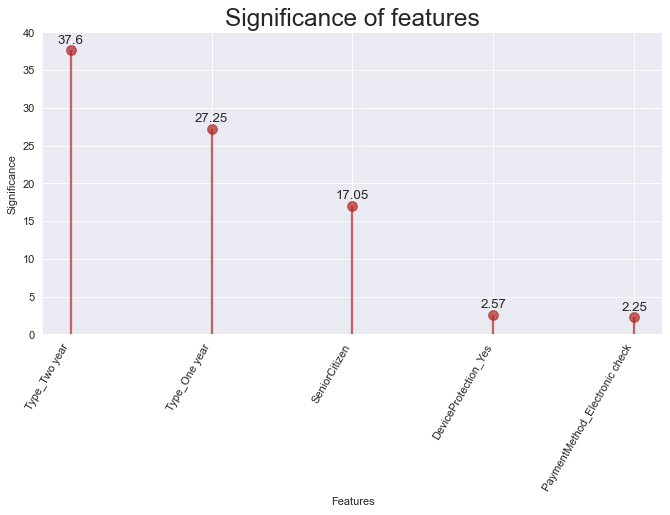

In [92]:
fig, ax = plt.subplots(figsize=(10,5), dpi= 80)
ax.vlines(x=top_5['feature'], ymin=0, ymax=top_5['importance'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=top_5['feature'], y=top_5['importance'], s=75, color='firebrick', alpha=0.7)

ax.set_title('Significance of features', fontdict={'size':22})
plt.xlabel('Features')
ax.set_ylabel('Significance')
ax.set_xticks(top_5['feature'])
ax.set_xticklabels(top_5.feature, rotation=60, fontdict={'horizontalalignment': 'right', 'size':10})
ax.set_ylim(0, 40)

for row in top_5.itertuples():
    ax.text(row.feature, row.importance+0.5, s=round(row.importance, 2), 
            horizontalalignment= 'center', verticalalignment='bottom', fontsize=12)

plt.show();

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:  </b> 
The most significant features were: Type_Two year, Type_One year, SeniorCitizen, DeviceProtection_Yes, PaymentMethod_Electronic check
</div>

<a name="8."></a><br/>
<font size="5"><b>8.Clustering clients</b></font>.<br/>
[<font size="2">(to table of contents)</font>](#1common.)

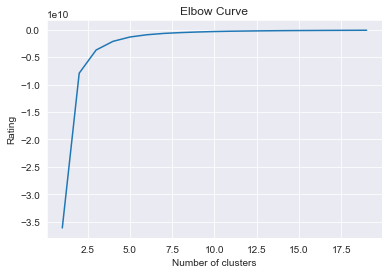

In [93]:
#find the optimal number of clusters using the "elbow method"
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of clusters')
plt.ylabel('Rating')
plt.title('Elbow Curve')
plt.show()

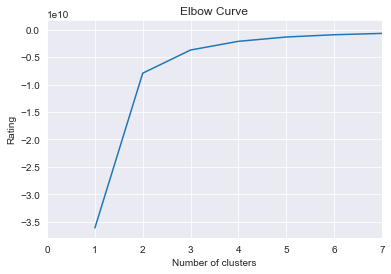

In [94]:
#enlarge a little to make it easier to see
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of clusters')
plt.ylabel('Rating')
plt.title('Elbow Curve')
plt.xlim(0,7)
plt.show()

* The optimal number of clusters is in the range from 2 to 3

In [95]:
# Let us take for calculations the number of clusters equal to 3 
model = KMeans(n_clusters = 3,  random_state = 90) 
labels = model.fit_predict(features)

In [96]:
# save cluster labels
df['cluster'] = labels

In [97]:
# Let's see the size of the groups
df.groupby('cluster').size()

cluster
0    4166
1    1611
2    1255
dtype: int64

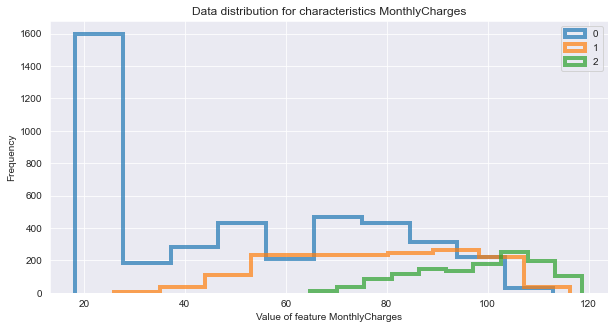

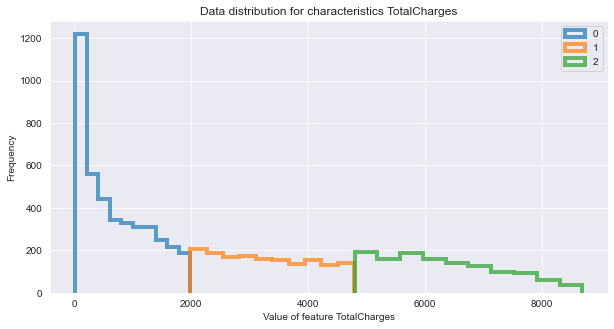

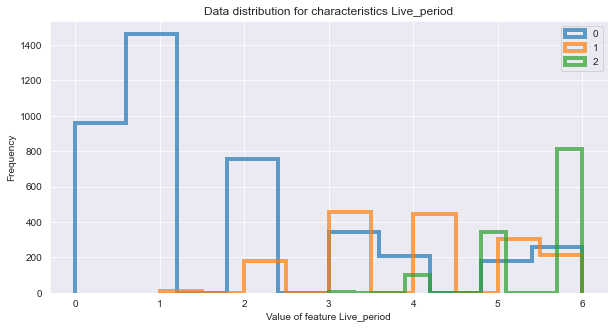

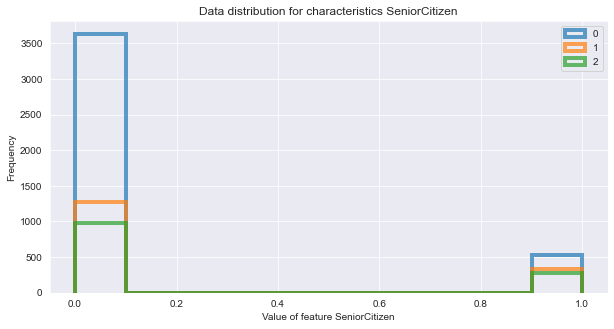

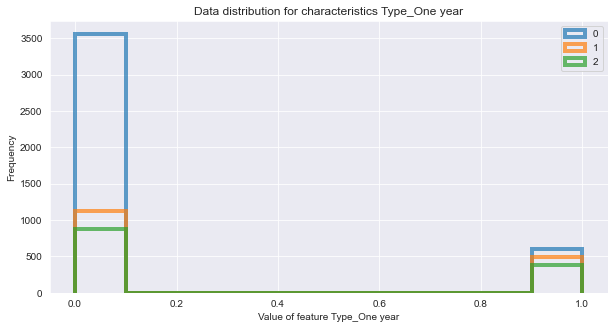

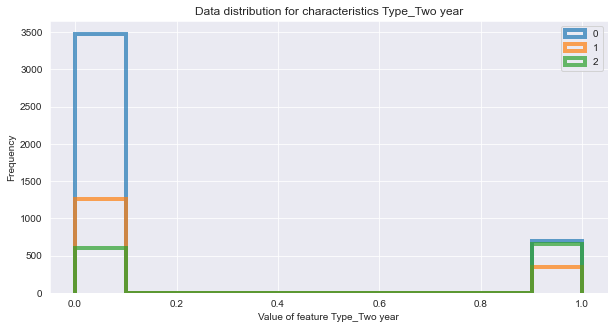

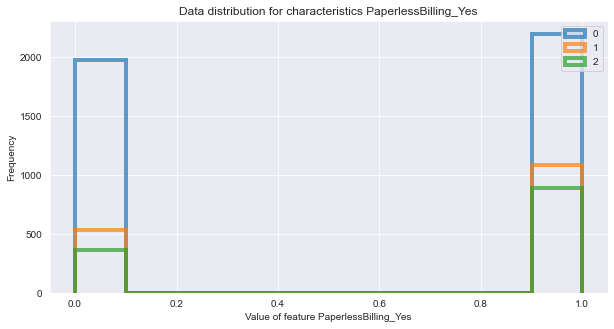

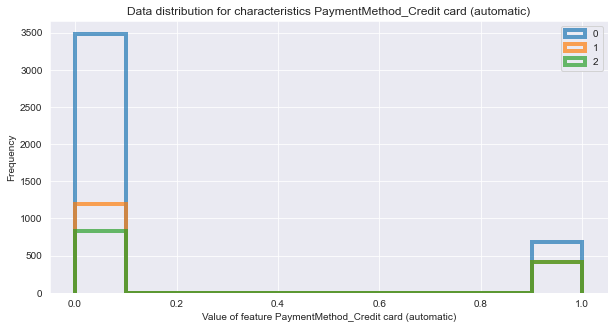

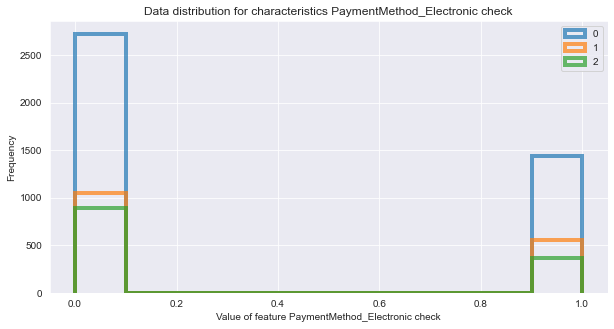

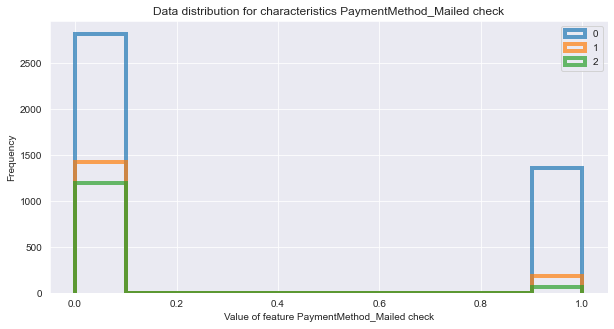

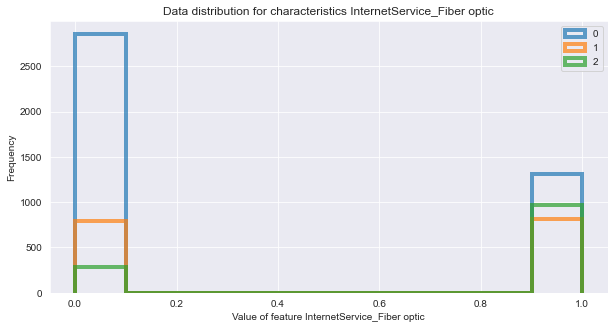

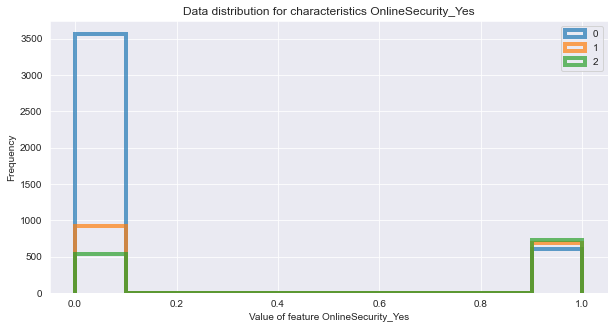

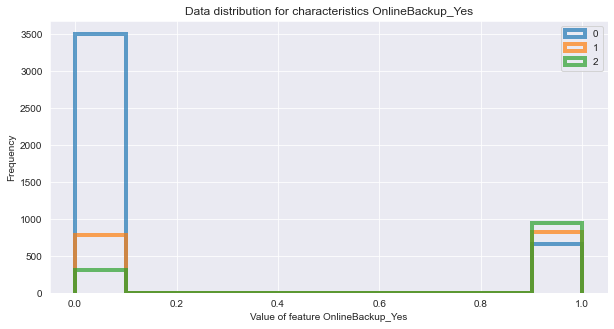

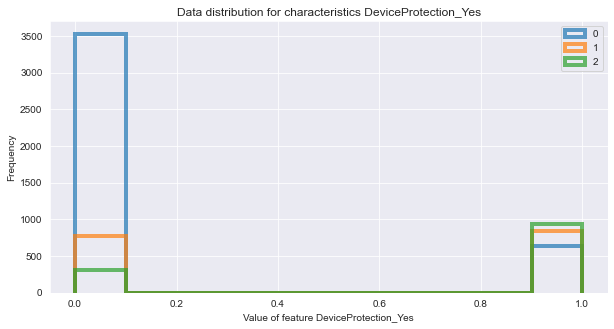

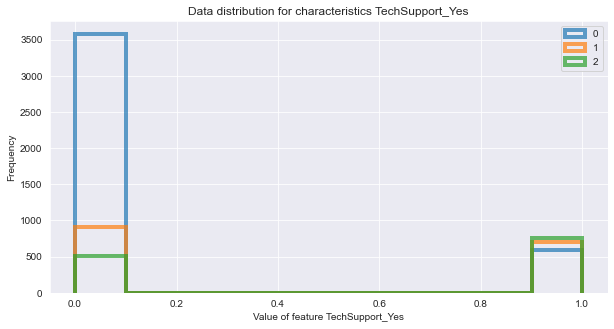

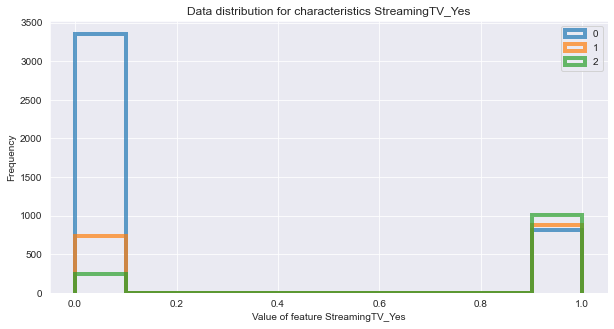

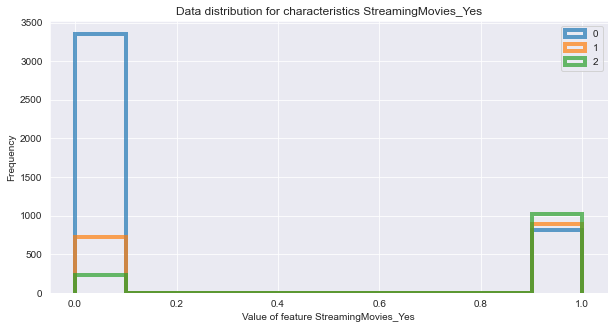

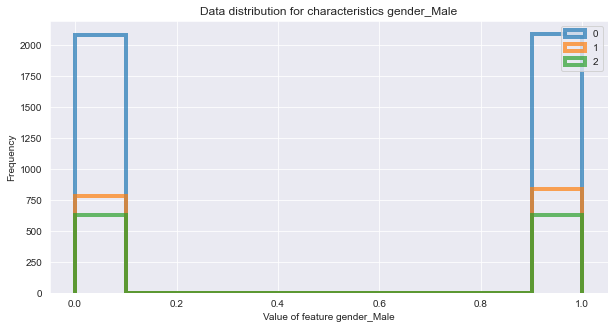

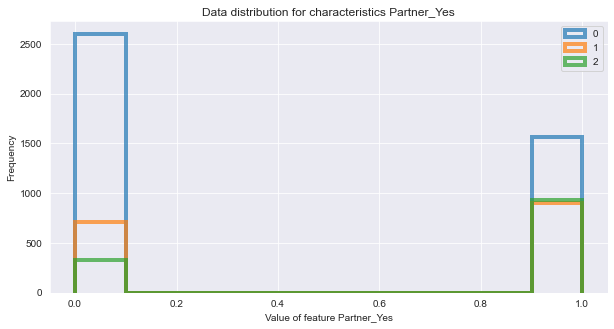

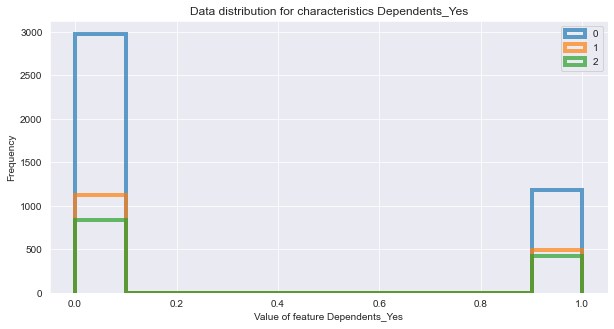

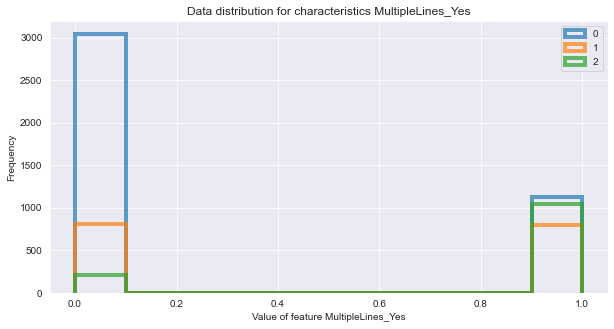

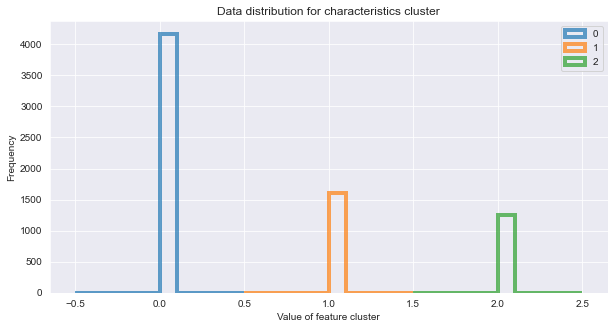

In [98]:
#Let's construct feature distributions for clusters
for column in df.drop(columns = ['EndDate']).columns:
    df.groupby('cluster')[column].plot(kind='hist', figsize = (10,5), histtype='step', 
            legend=True, alpha=0.7, linewidth=4, title='Data distribution for characteristics '+ str(column))  
    plt.xlabel('Value of feature ' + column)
    plt.show()

In [99]:
# Grouping by clusters
cluster_grouped = df.groupby('cluster')['EndDate'].agg({'mean'}).round(2).sort_values(by='mean').reset_index()
cluster_grouped.columns = ['Cluster number', 'Average churn rate']
cluster_grouped

,Cluster number,Average churn rate
0,2,0.14
1,1,0.22
2,0,0.32


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:  </b> Let's describe a typical portrait of a client from each cluster.
    

Cluster 0: (average churn rate 32%) the largest class by quantity, low monthly payments,
the highest total payments, not a pensioner, the contract is concluded for 1 year, or 2 years, automatic payment by card, Fiber_optic no, online protection - no, backup-no, device_protection - no, technical support - no, TV -no, the gender is not important , having a partner is not important
    

Cluster 1: (average churn rate 14%) the lowest class by number of contracts, high monthly payments and total payments, not retired, contract duration is not important, payment by check by mail, Fiber_optic yes, online protection yes,
backup - yes, device_protection - yes, technical support - yes, TV - yes, the gender is not important, having a partner is important
    
Cluster 2: (average churn rate 22%) middle class by the number of contracts, average monthly payments and general payments, not a pensioner, contract term 1 year, payment by electronic check, Fiber_optic does not matter, online protection does not matter, backup is not important, device_protection - it doesn't matter, technical support - yes, TV - yes, the gender doesn't matter, having a partner - yes
    
    
Since cluster 2 contains a lot of "not important". Let's see how many clusters the dendrogram will offer us
    
    
</div>

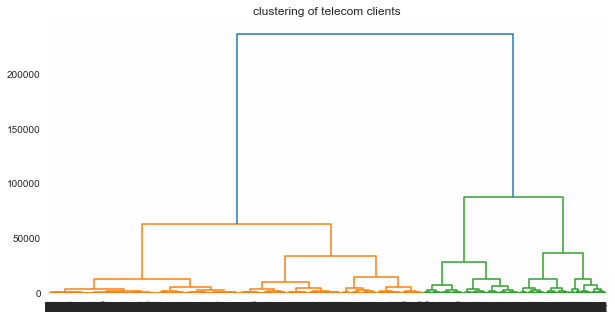

In [100]:
# Let's see the dendrogram
linked = linkage(features, method = 'ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top')
plt.title('clustering of telecom clients')
plt.show()

* dendrogram offers 2 classes

In [101]:
# Let's take for calculations the number of clusters equal to 2
model_2 = KMeans(n_clusters = 2,  random_state = 90) 
labels_2 = model_2.fit_predict(features)

In [102]:
# save cluster labels
df['cluster'] = labels_2

In [103]:
# Let's see the size of the groups
df.groupby('cluster').size()

cluster
0    4943
1    2089
dtype: int64

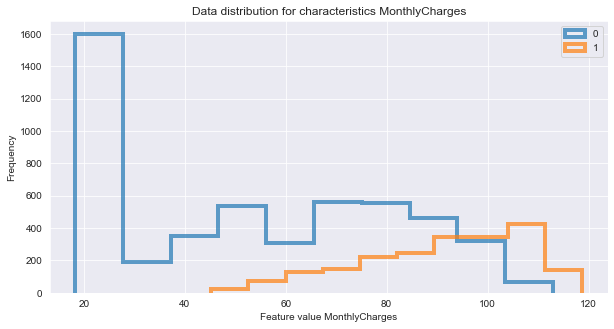

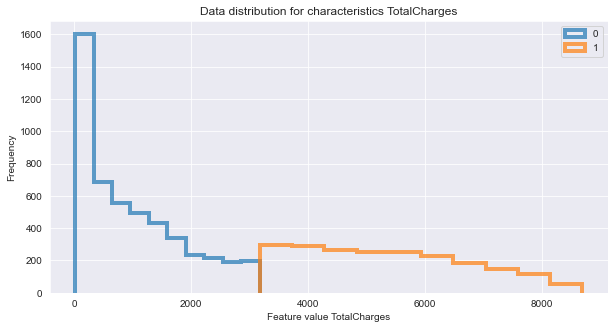

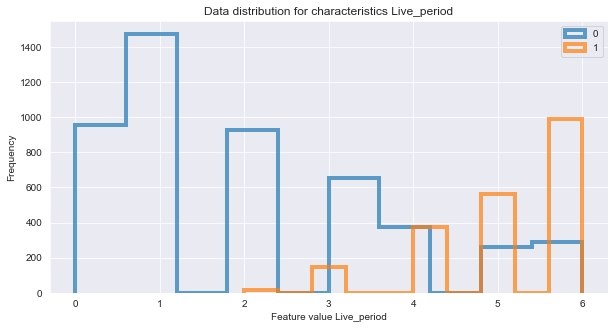

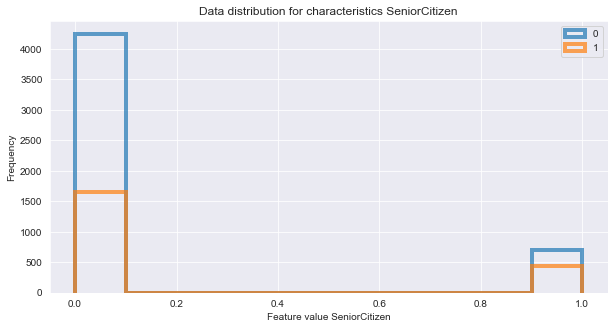

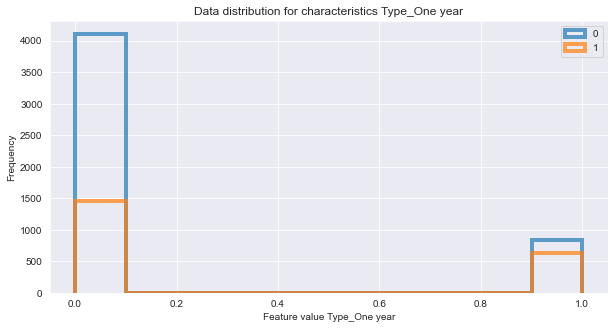

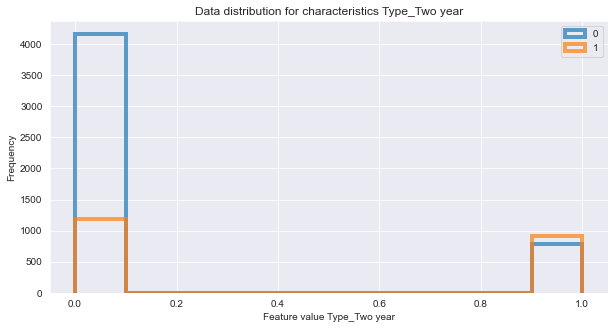

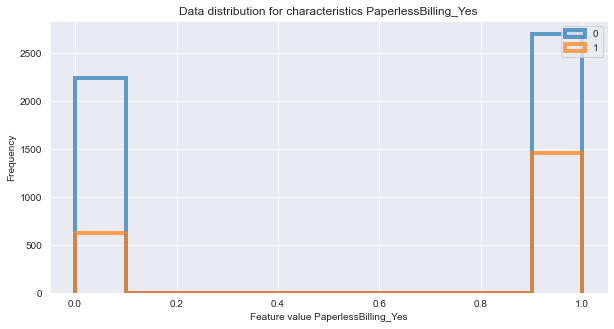

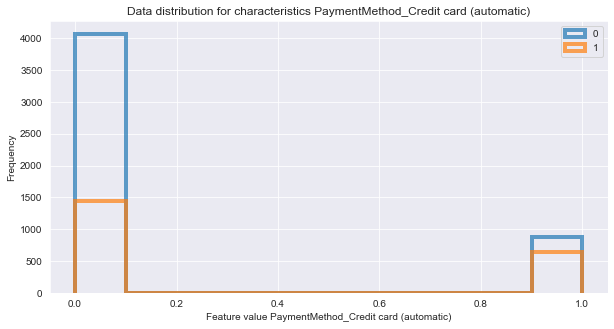

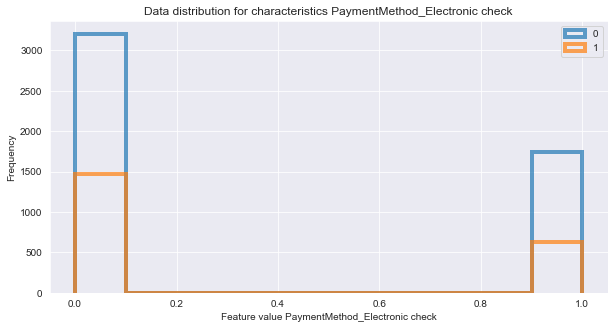

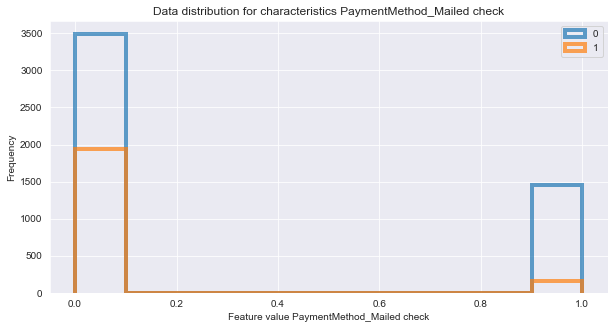

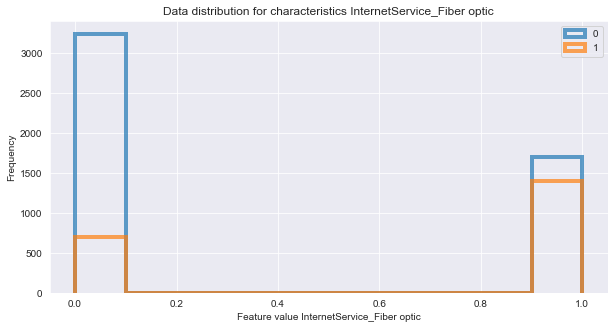

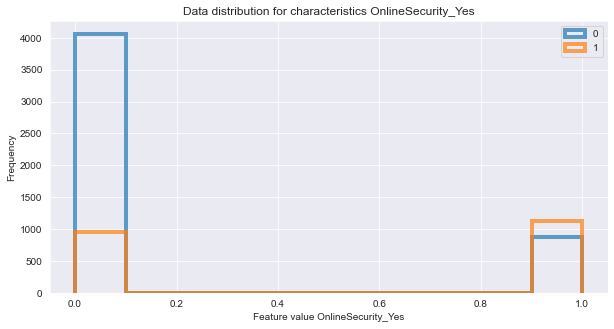

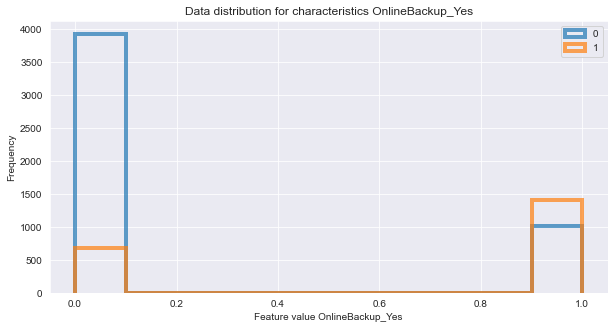

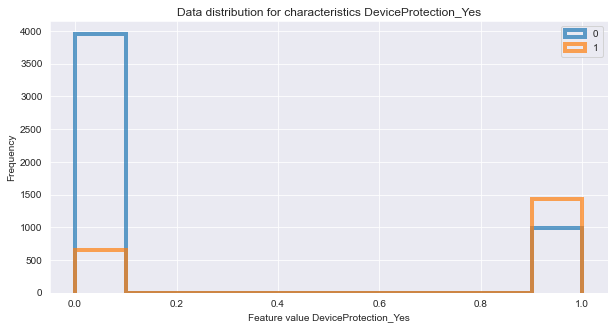

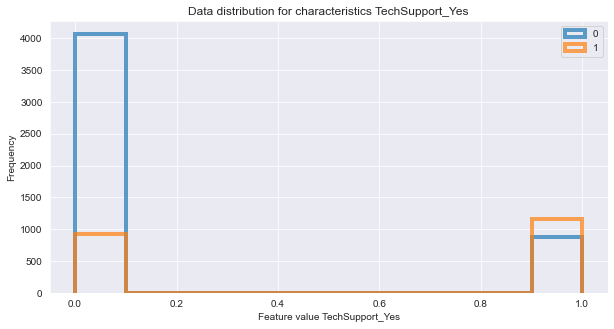

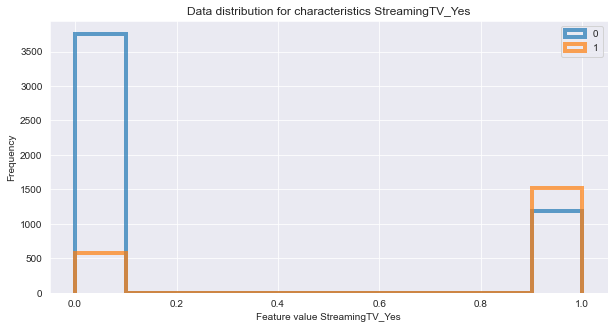

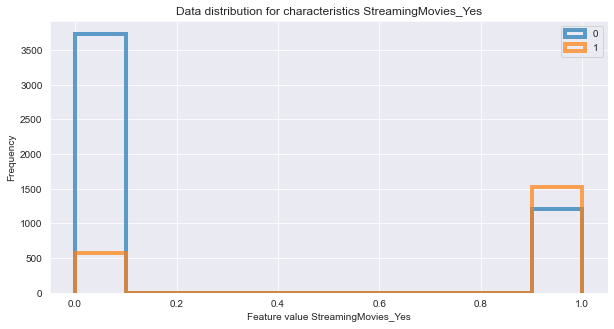

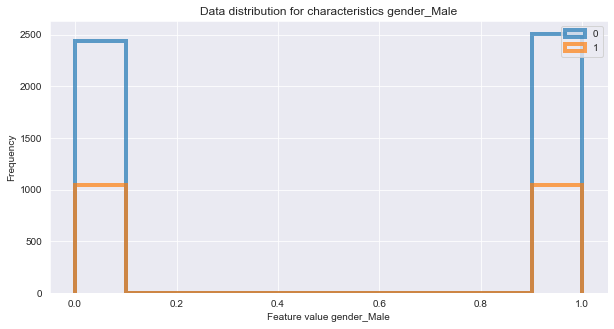

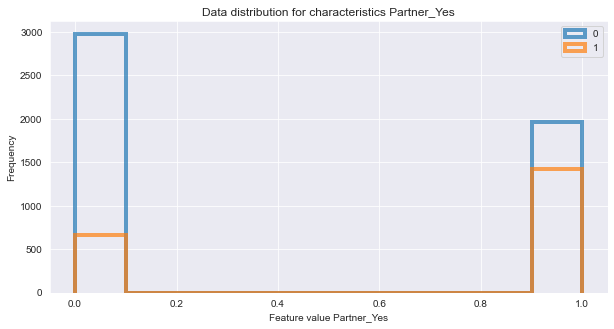

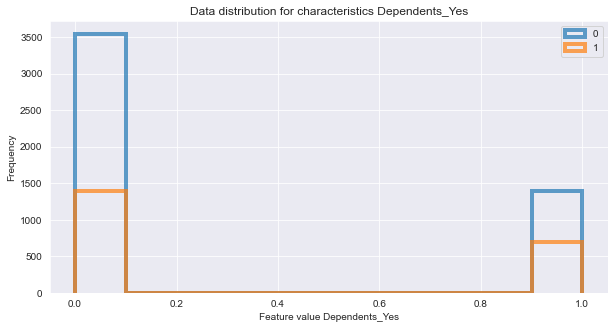

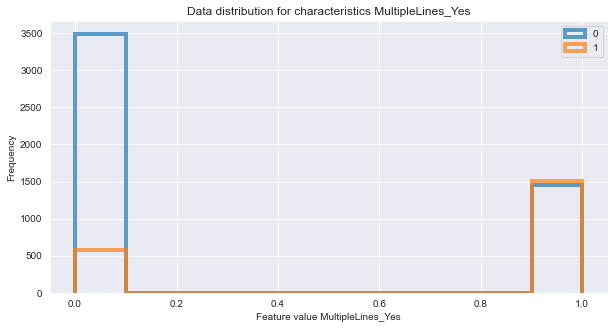

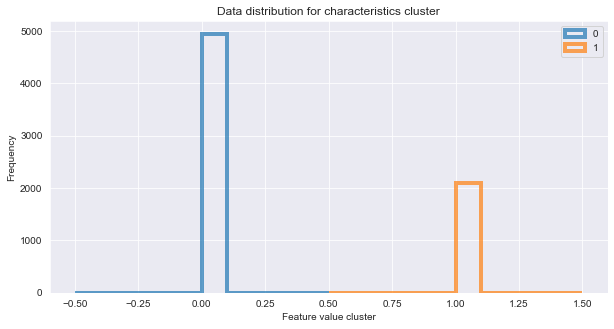

In [104]:
#Let's construct feature distributions for clusters
for column in df.drop(columns = ['EndDate']).columns:
    df.groupby('cluster')[column].plot(kind='hist', figsize = (10,5), 
        histtype='step', legend=True, alpha=0.7, 
        linewidth=4, title='Data distribution for characteristics '+ str(column))  
    plt.xlabel('Feature value ' + column)
    plt.show()

In [105]:
# Grouping by clusters
cluster_grouped = df.groupby('cluster')['EndDate'].agg({'mean'}).round(2).sort_values(by='mean').reset_index()
cluster_grouped.columns = ['Cluster number', 'Average churn rate']
cluster_grouped

,Cluster number,Average churn rate
0,1,0.15
1,0,0.31


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:  </b> Let's describe a typical portrait of a client from each cluster.
    
Cluster 0: (average churn rate 31%) the cluster is twice as large by the number of contracts, low monthly payments,
the highest total payments, not a pensioner, monthly payment, payment by electronic check, Fiber_optic no, online protection no, backup no, device_protection no, technical support no, TV no, the gender is not important, the presence of a partner is no
    
Cluster 1: (average churn rate 15%) the cluster is half as much by the number of contracts, high monthly payments, general payments, not a pensioner, monthly payment, payment by electronic check, Fiber_optic yes, online protection yes, backup yes, device_protection - yes, technical support - it doesn't matter, TV - yes, the gender doesn't matter, having a partner - yes   
    
    
</div>

<a name="9."></a><br/>
<font size="5"><b>9.General conclusion</b></font>.<br/>
[<font size="2">(to table of contents)</font>](#1common.)

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b> General conclusion:  </b> In the course of all the work, the data were processed, one neural network and 6 models were trained. The best metric roc_auc_score = 0.91 on the test sample was shown by the CatBoostClassifier model. The most significant signs were: the type of contract conclusion and whether or not. We performed clustering and drew a portrait of the most dangerous customer group for churn. Deciding 3 clusters or 2 is best for marketers. Here is a description of the cluster with the highest average churn rate - 32%. 

- the largest class in terms of the number of contracts,
- low monthly payments,
- the largest total payments,
- not a pensioner,
- the contract is concluded for 1 year, or 2 years,
- automatic payment by card,
- Fiber_optic no,
- online protection - no,
- backup-no,
- device_protection - no,
- technical support - no,
- TV -no,
- gender is not important,
- having a partner is not important
</div>